# CIFAR_10 Image Classifier
We are going to create a baseline model which can perform classification on CIFAR_10 dataset. We will be doing the following things:
1. Load CIFAR_10 and normalize it
2. Build a Neural Network - CNN
3. Define a Loss Function
4. Training Neural Network
5. Testing Neural Network

Let's get started

## 1. Load CIFAR_10 and Normalize it

In [9]:
# Importing Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

I read that the output of `torchvision.datasets` are PIL Images in the range `[0,1]`. We can transform them to the range `[-1,1]` - Normalization.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

In [3]:
batch_size = 4
training_dataset = torchvision.datasets.CIFAR10(
        root = "data",
        train= True,
        download= True,
        transform = transform
)
test_dataset = torchvision.datasets.CIFAR10(
        root = "data",
        train = False,
        download = True,
        transform = transform
)

100%|████████████████████████| 170498071/170498071 [01:27<00:00, 1944815.36it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [4]:
trainloader = torch.utils.data.DataLoader(training_dataset, batch_size = batch_size, shuffle = True, num_workers = 2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 2)

In [6]:
labels_map = dict((v,k) for k,v in training_dataset.class_to_idx.items())
print(labels_map)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [7]:
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [12]:
def cifar_display(image):
    image = image / 2 + 0.5 # Unnormalizing
    image = image.permute(1,2,0)
    plt.imshow(image)

frog  ship  ship  ship 


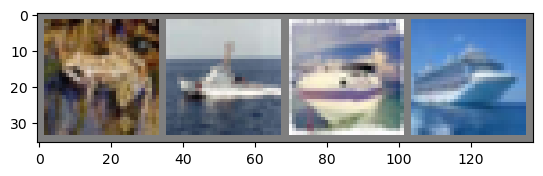

In [13]:
datatiter = iter(trainloader)
images, labels = next(datatiter)

# show images
cifar_display(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 2. Build a Neural Network - CNN

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class CIFARNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 3 input-channels (RGB), 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x    

In [16]:
model = CIFARNet()

In [17]:
model.to("mps")

CIFARNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 3. Define a Loss function

## 4. Training a Neural Network

## 5. Testing a Neural Network